# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Statements

In [146]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [147]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [161]:
df_data = pd.read_csv('mission_launches.csv', index_col=0)

df_data['Price'] = df_data['Price'].str.replace(',', '').astype(float)



# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [22]:
df_data.shape
#df_data.count()

(4324, 8)

In [16]:
df_data.columns

Index(['Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail',
       'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [26]:
print(f'Any NaN values? {df_data.isna().values.any()}')
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any NaN values? True
Any duplicates? False


In [35]:
df_data.head()

,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [34]:
df_data.describe()

,Unnamed: 0
count,"4,324.00"
mean,"2,161.50"
std,"1,248.38"
min,0.00
25%,"1,080.75"
50%,"2,161.50"
75%,"3,242.25"
max,"4,323.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [48]:
org_counts = df_data['Organisation'].value_counts()
top_20_orgs = org_counts.nlargest(20)


Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
Name: count, dtype: int64

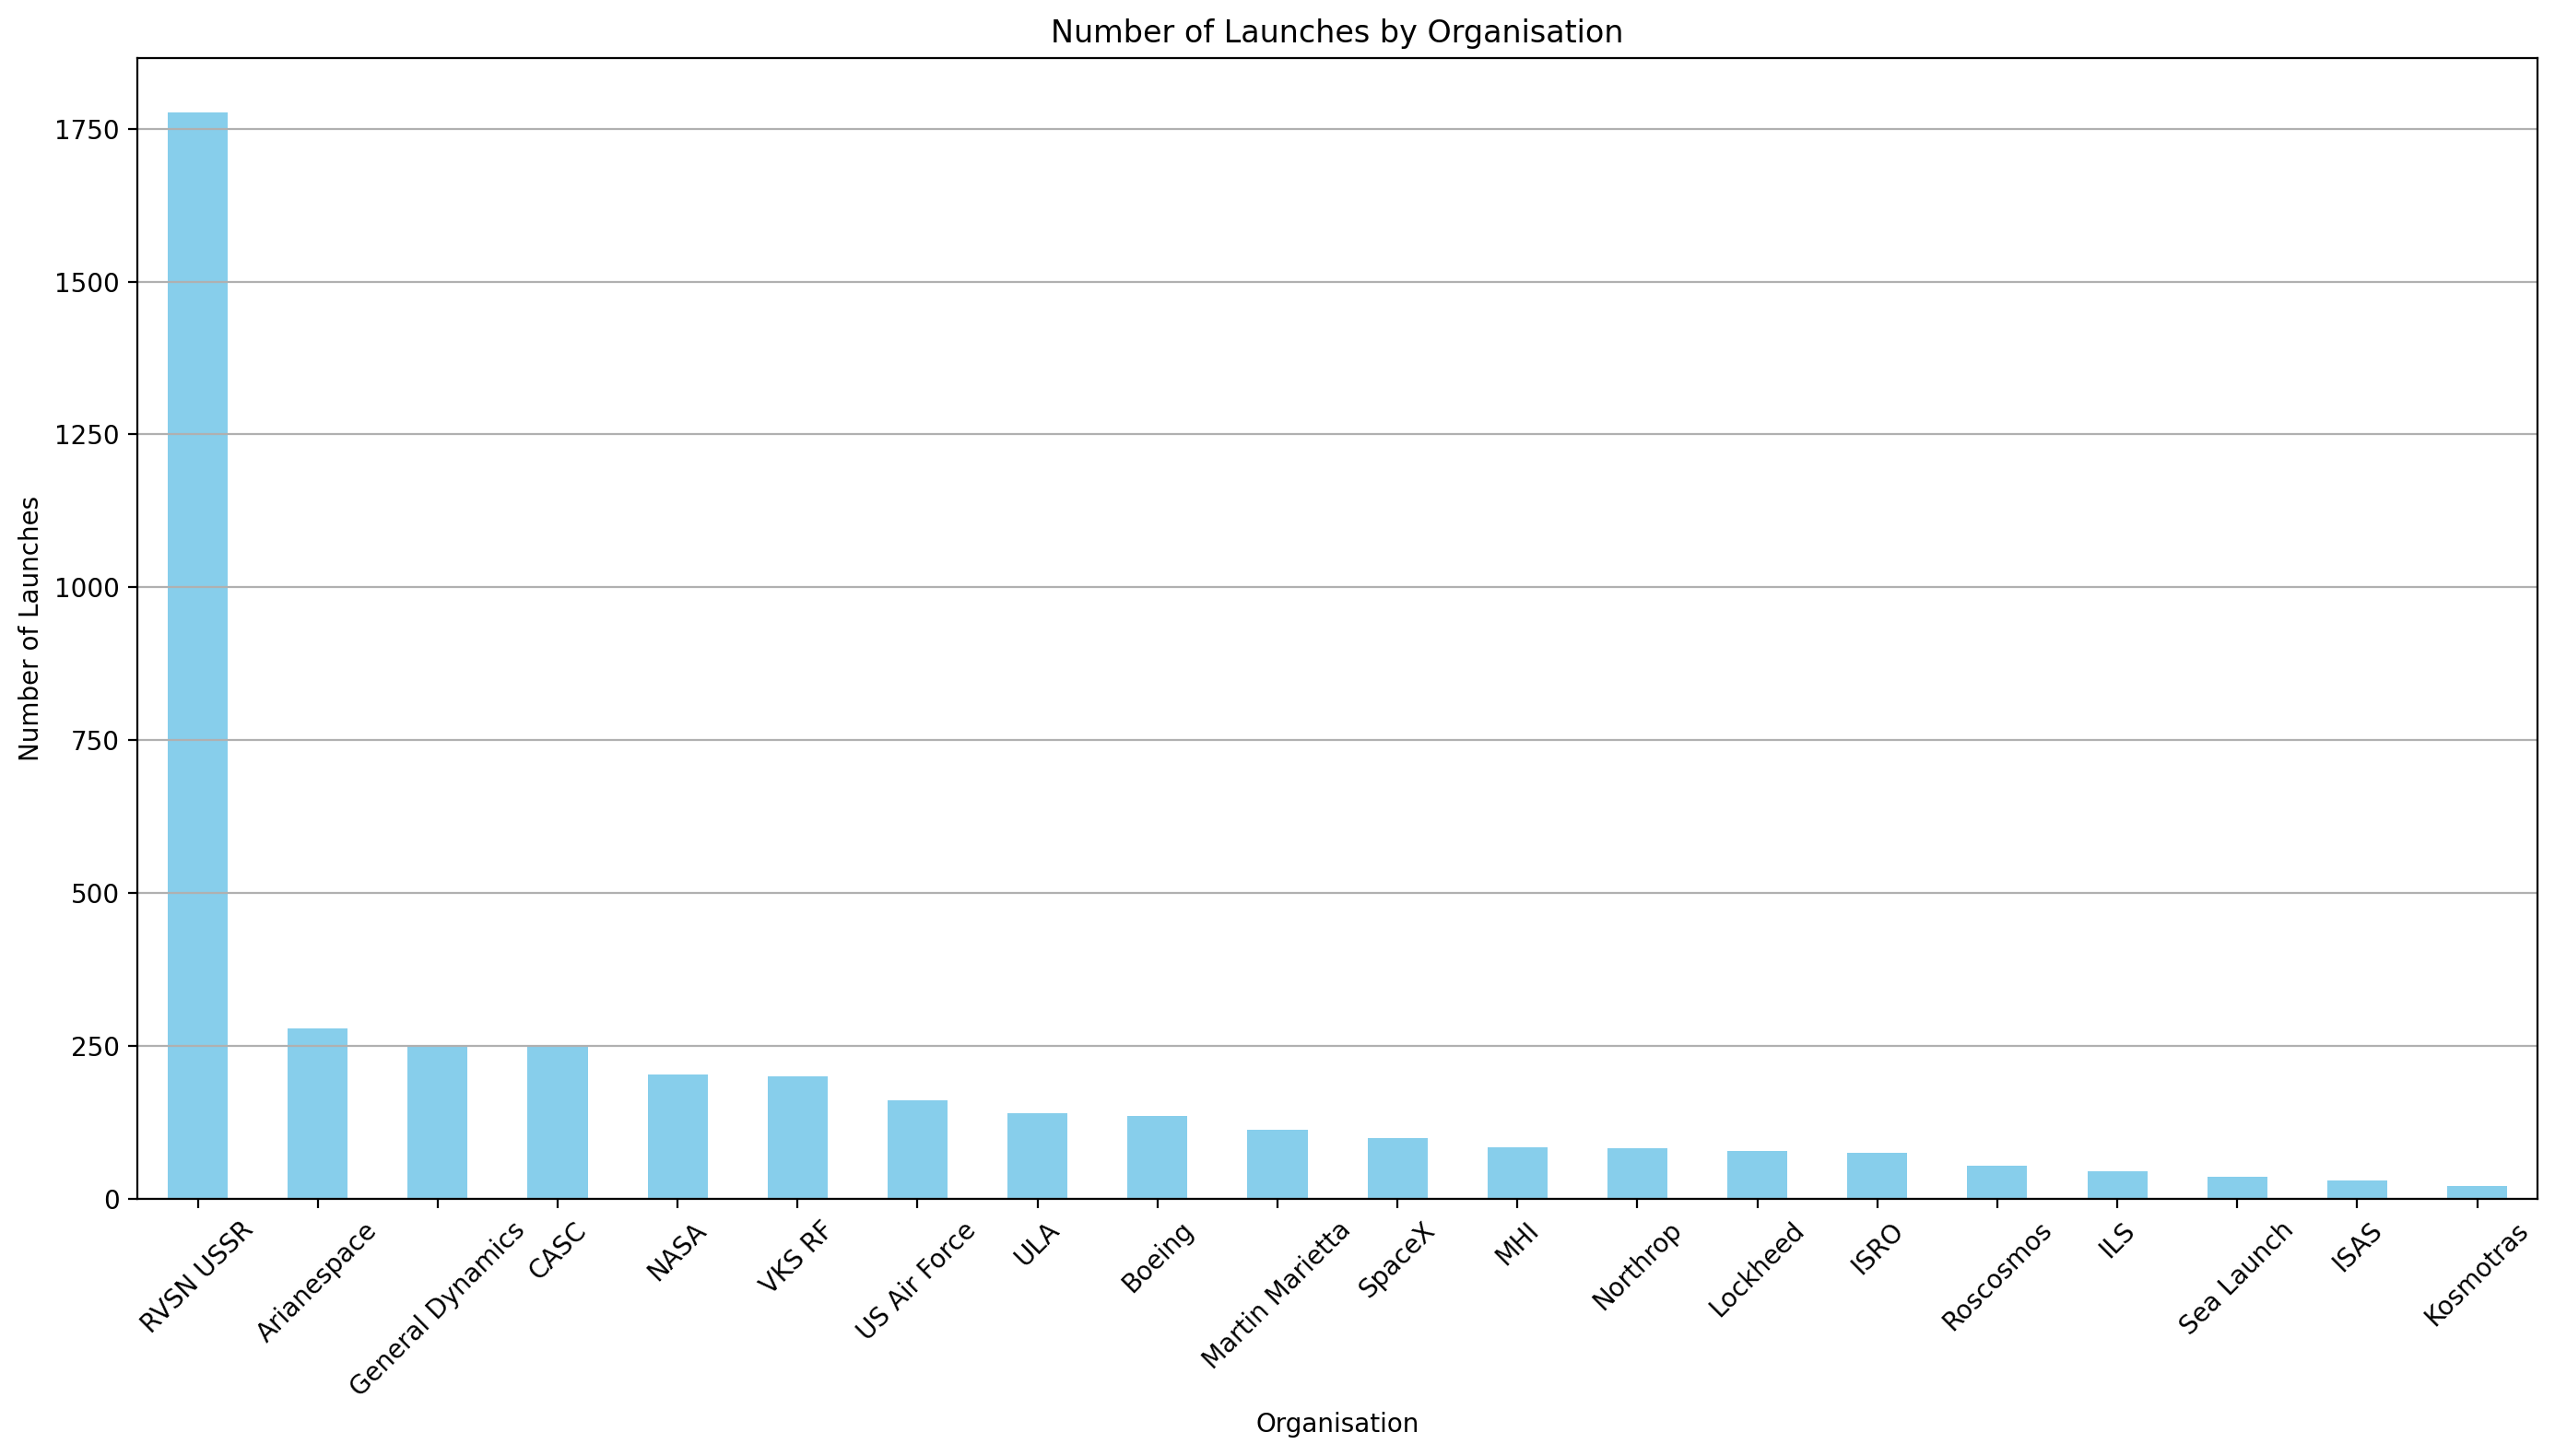

In [49]:
plt.figure(figsize=(14,8), dpi=200)
top_20_orgs.plot(kind='bar', color='skyblue')
plt.title('Number of Launches by Organisation')
plt.xlabel('Organisation')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [51]:
rocket_status_counts = df_data['Rocket_Status'].value_counts()


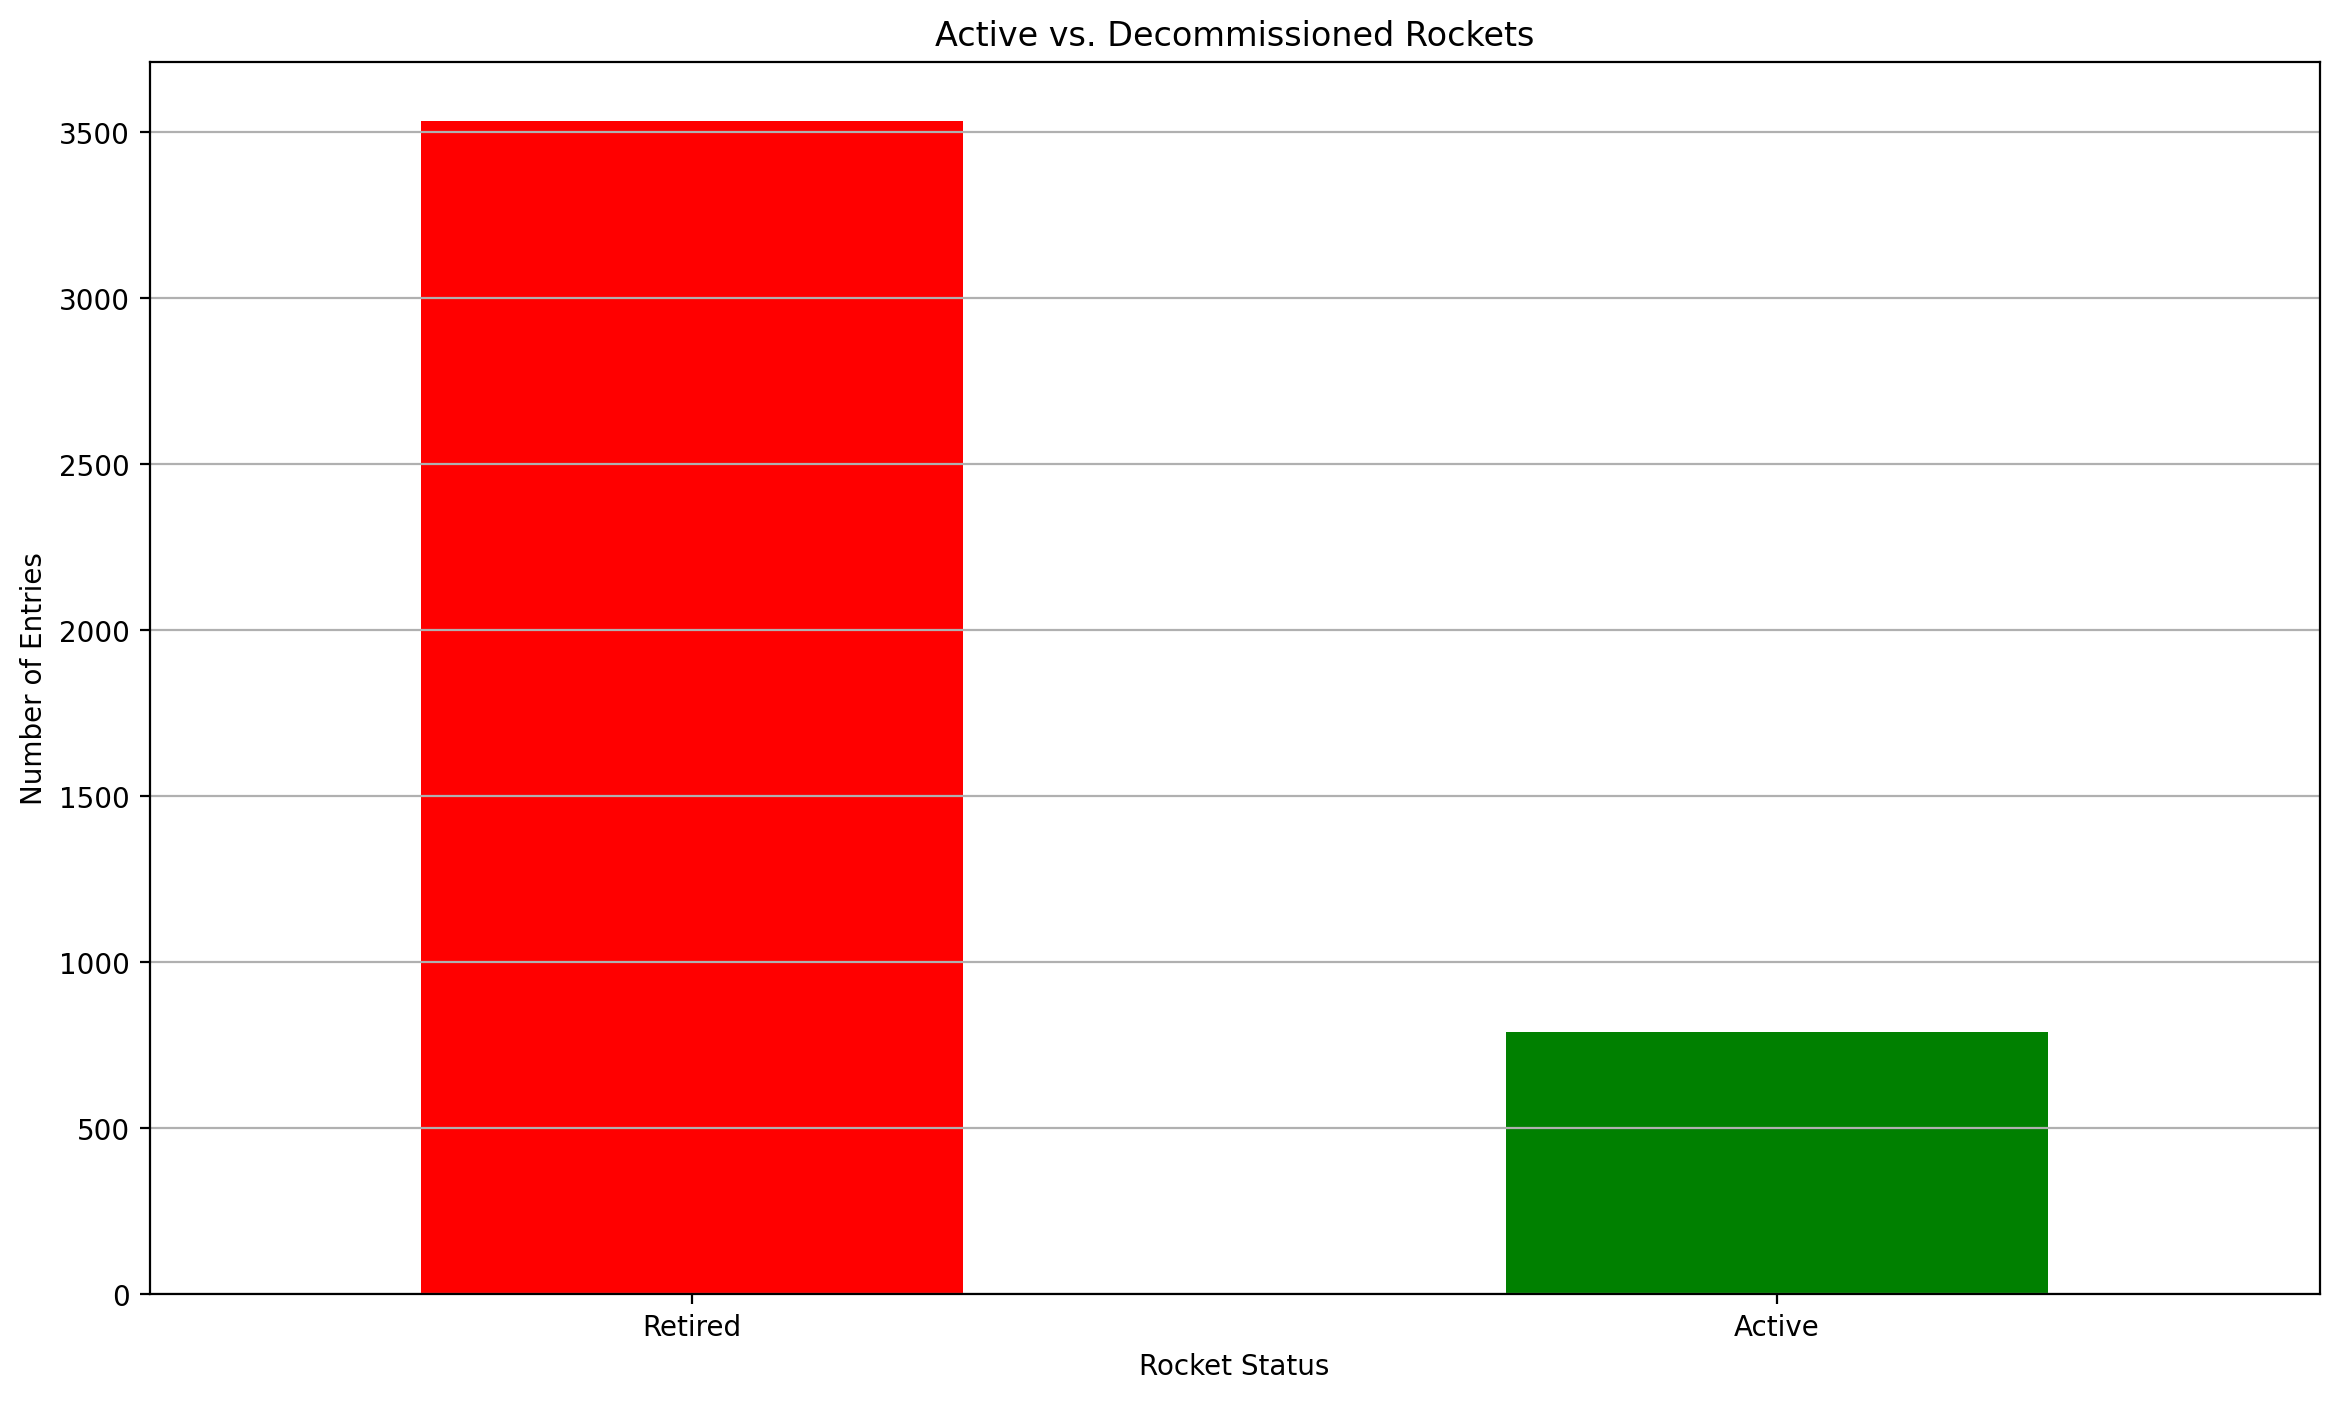

In [61]:
plt.figure(figsize=(14,8), dpi=200)
ax = rocket_status_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Active vs. Decommissioned Rockets')
plt.xlabel('Rocket Status')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
ax.set_xticklabels(['Retired', 'Active'])
plt.grid(axis='y')
#plt.tight_layout()
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

Text(-3.6805555555555554, 0.5, 'Count')

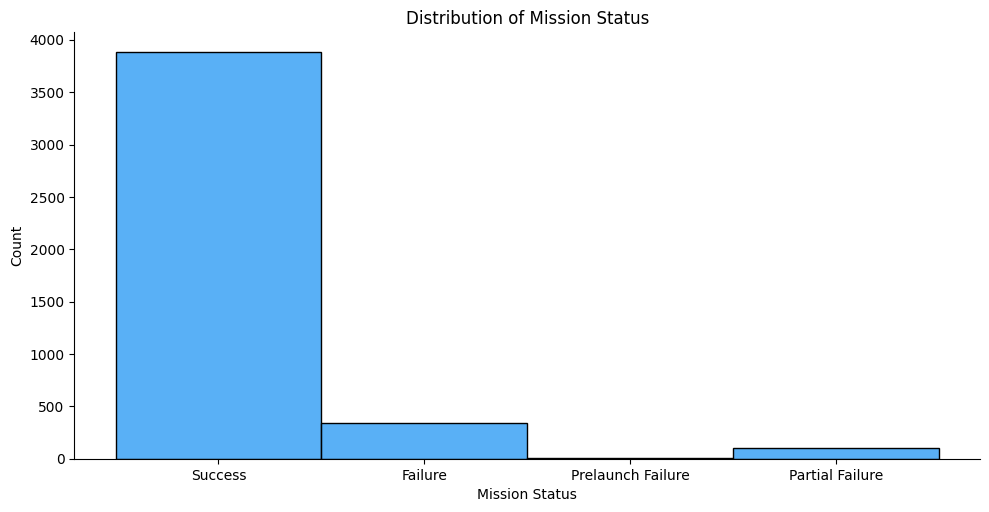

In [59]:
sns.displot(df_data['Mission_Status'],
            bins=50,
            aspect=2,
            kde=False,
            color='#2196f3')
plt.title('Distribution of Mission Status')
plt.xlabel('Mission Status')
plt.ylabel('Count')

In [149]:

df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce', utc=True)
df_data = df_data.dropna(subset=['Date']).sort_values(by='Date', ascending=False)
df_data['Year'] = df_data['Date'].dt.year.astype('Int64')
df_data['Year']


0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
4319    1958
4320    1958
4321    1957
4322    1957
4323    1957
Name: Year, Length: 4198, dtype: Int64

In [150]:
            
failures_data = df_data[df_data['Mission_Status'] == 'Failure']

failures_per_year = failures_data.groupby('Year').size()
failures_per_year


Year
1957     1
1958    14
1959     9
1960    19
1961    17
        ..
2016     2
2017     5
2018     2
2019     5
2020     6
Length: 63, dtype: int64

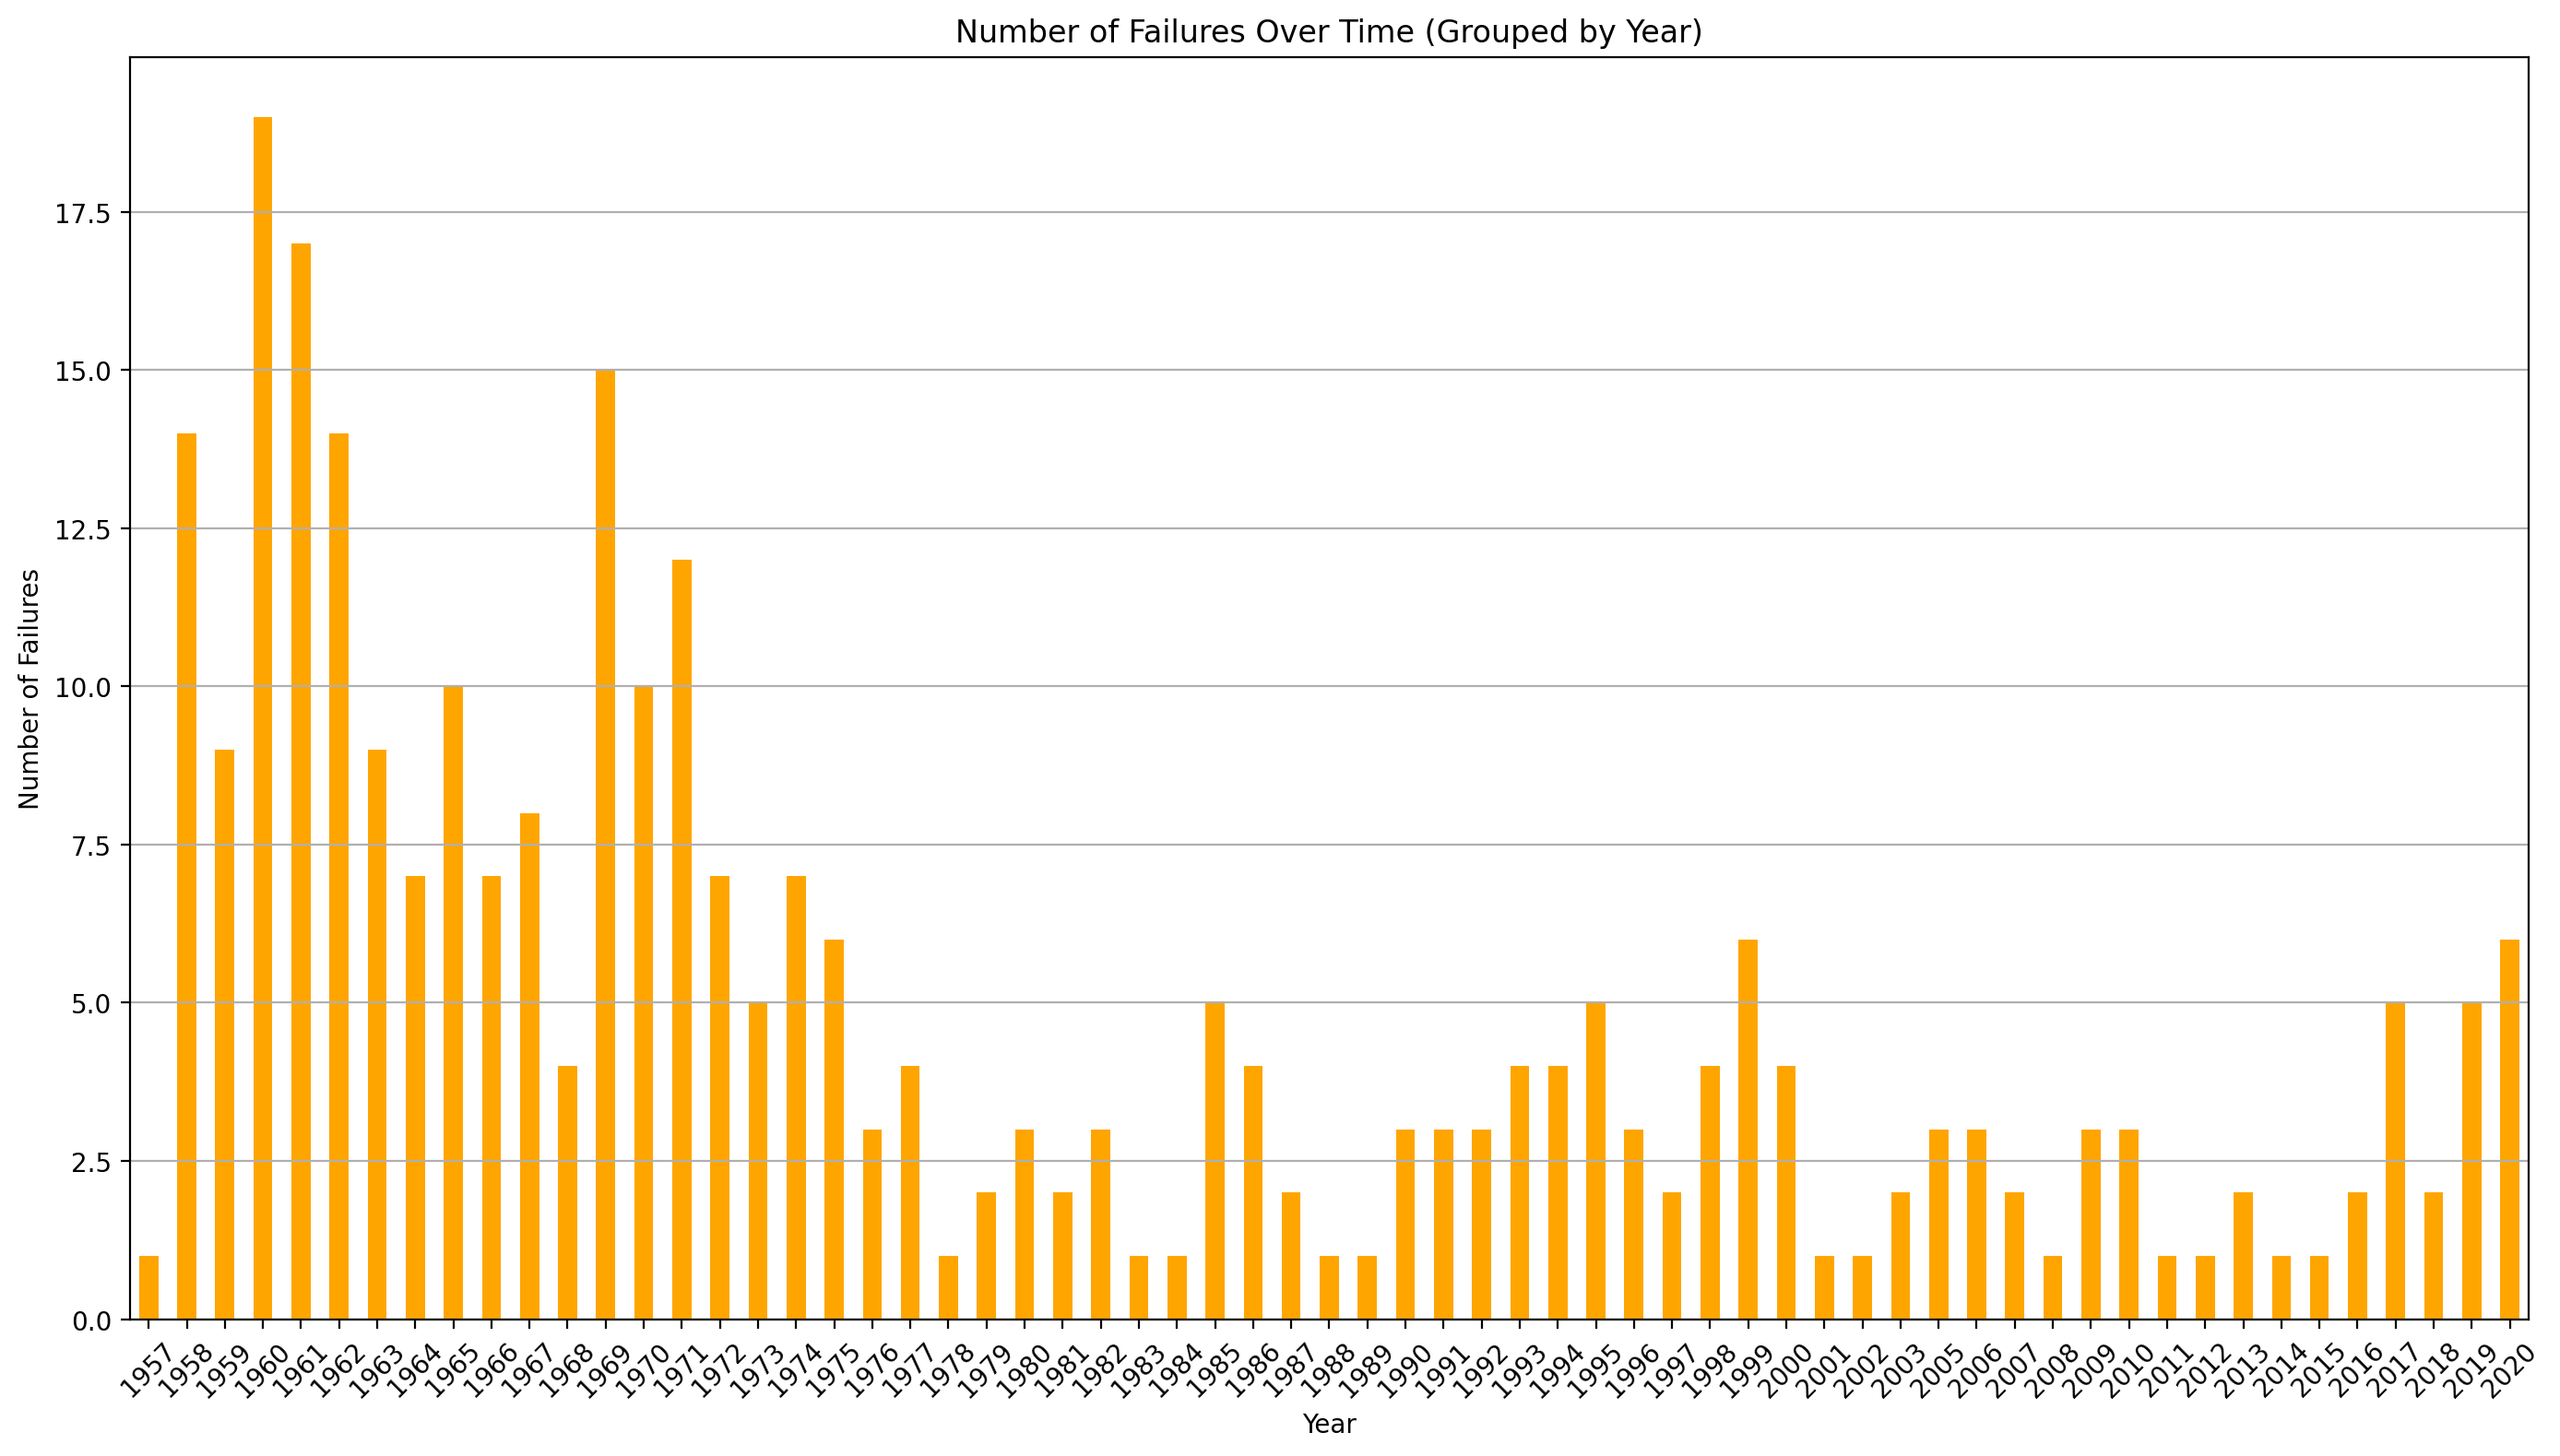

In [151]:

plt.figure(figsize=(14,8), dpi=200)
failures_per_year.plot(kind='bar', color='orange')
plt.title('Number of Failures Over Time (Grouped by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.xticks(rotation=45)

# Set x-tick labels to integer values
#plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.grid(axis='y')
plt.tight_layout()
plt.show()


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

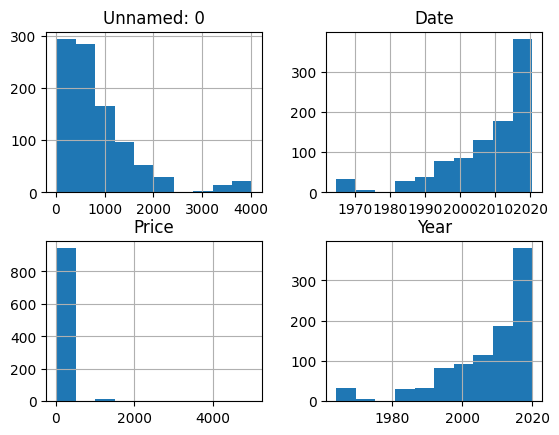

In [152]:

# Convert 'Price' column to numeric, forcing errors to NaN
# df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

df_data = df_data.dropna(subset=['Price']).sort_values(by='Price', ascending=False)

df_data.hist()

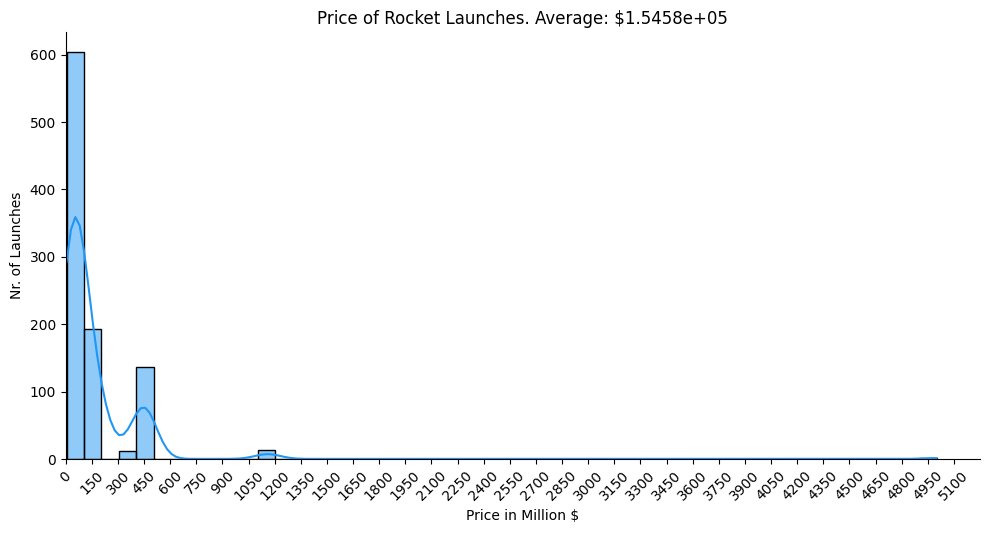

In [153]:

sns.displot(df_data['Price'],
            bins=50,
            aspect=2,
            kde=True,
            color='#2196f3')

plt.title(f'Price of Rocket Launches. Average: ${(1000*df_data['Price'].mean()):.6}')
plt.xlabel('Price in Million $')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(50))  # Limit the number of x-ticks to 10
plt.xlim(left=0)  # Set the left limit of the x-axis to 0

plt.ylabel('Nr. of Launches')

plt.show()

np.float64(153.7921991701245)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [163]:
#df_data[['Location', 'Country']] = df_data['Location'].str.rsplit(",", 1, expand = True)
#df_data[['Location', 'Country']] = df_data['Location'].str.rsplit(", ", 1, expand=True)
df_data[['Location', 'Country']] = df_data['Location'].str.rsplit(", ", n=1, expand=True)

 


In [164]:
#replace values as required
df_data['Country'].replace(
    ["Russia", "New Mexico", "Yellow Sea", "Shahrud Missile Test Site", "Pacific Missile Range Facility", "Barents Sea", "Gran Canaria", "USA" ],
    ["Russian Federation", "United States of America", "China", "Iran", "United States of America", "Russian Federation", "United States of America", "United States of America"],
    regex=True, 
    inplace=True
     )


C:\Users\christof.kaelin@abraxas.ch\AppData\Local\Temp\ipykernel_24664\2176513907.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data['Country'].replace(


In [ ]:
rue)
 
#replace values as required
df_data['Country'].replace(
    ["Russia", "New Mexico", "Yellow Sea", "Shahrud Missile Test Site", "Pacific Missile Range Facility", "Barents Sea", "Gran Canaria", "USA" ],
    ["Russian Federation", "United States of America", "China", "Iran", "United States of America", "Russian Federation", "United States of America", "United States of America"],
    regex=True, 
    inplace=True
     )


# Use a Choropleth Map to Show the Number of Failures by Country


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 